In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle

In [0]:
!cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c nlp-getting-started

  0% 0.00/965k [00:00<?, ?B/s]
100% 965k/965k [00:00<00:00, 63.7MB/s]
  0% 0.00/22.2k [00:00<?, ?B/s]
100% 22.2k/22.2k [00:00<00:00, 19.9MB/s]
  0% 0.00/411k [00:00<?, ?B/s]
100% 411k/411k [00:00<00:00, 135MB/s]


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [7]:
df=pd.read_csv("/content/train.csv",sep=',')
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [9]:
labels=df["target"]
labels=np.array(labels)
train_sentences=df["text"].astype(str)
train_sentences=np.array(train_sentences)
train_sentences[:5],labels[:5]

(array(['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all',
        'Forest fire near La Ronge Sask. Canada',
        "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected",
        '13,000 people receive #wildfires evacuation orders in California ',
        'Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school '],
       dtype=object), array([1, 1, 1, 1, 1]))

In [10]:
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
print(len(stopwords))

153


In [11]:
import string

table = str.maketrans('', '', string.punctuation)
sentences=[]

for sentence in train_sentences:
        filtered_sentence=""
        sentence=sentence.split(" ")
        
        for word in sentence:
          word=word.lower()
          filter_word=""  
          for w in word:
            filter_word=filter_word+w.translate(table) 
          #print(filter_word)
          if filter_word in stopwords:

           filter_word=""

          filtered_sentence=filtered_sentence+" "+filter_word 
          
        sentences.append(filtered_sentence) 
print(sentences[:10])  

['  deeds   reason   earthquake may allah forgive us ', ' forest fire near la ronge sask canada', '  residents asked  shelter  place   notified  officers no  evacuation  shelter  place orders  expected', ' 13000 people receive wildfires evacuation orders  california ', ' just got sent  photo  ruby alaska  smoke  wildfires pours   school ', ' rockyfire update  california hwy 20 closed   directions due  lake county fire  cafire wildfires', ' flood disaster heavy rain causes flash flooding  streets  manitou colorado springs areas', ' im  top   hill   can see  fire   woods', ' theres  emergency evacuation happening now   building across  street', ' im afraid   tornado  coming   area']


In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(sentences,labels,test_size=0.15)

In [13]:
X_train[:5],y_train[:5]

([' californias burning gov  drought wildfires httptcomkqsvp8e0g',
  ' earthquake sismo m 14  4km e  interlaken california time20150806 005225 utc20150805 175225 07 httptcowa5c77f8vq',
  ' mh370 debris found  reunion island  sad tragedy innocent crash mh370',
  ' wreckage conclusively confirmed   mh370 malaysia pm investigators   families     httptcoledmvezcol',
  '  residents asked  shelter  place   notified  officers no  evacuation  shelter  place orders  expected'],
 array([1, 1, 1, 1, 1]))

In [14]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

6471
6471
1142
1142


In [0]:
vocab_size = 20000
embedding_dim = 128
max_length = 50
trunc_type='post'
padding_type='post'

oov_tok = "<OOV>"

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(sentences)
word_index=tokenizer.word_index
train_sequences = tokenizer.texts_to_sequences(X_train)
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length)
val_sequences = tokenizer.texts_to_sequences(X_test)
val_padded = pad_sequences(val_sequences, padding=padding_type, maxlen=max_length)

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)), 
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)), 
    tf.keras.layers.Dropout(0.3),    
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)), 
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)), 
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 128)           2560000   
_________________________________________________________________
bidirectional (Bidirectional (None, 50, 128)           98816     
_________________________________________________________________
dropout (Dropout)            (None, 50, 128)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 50, 128)           98816     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 128)           0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 50, 128)           98816     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50, 128)           0

In [18]:
num_epochs = 5 

history = model.fit(train_padded, y_train, validation_data=(val_padded, y_test),epochs=num_epochs,verbose=2)

Epoch 1/5
203/203 - 57s - loss: 0.5415 - accuracy: 0.7248 - val_loss: 0.4160 - val_accuracy: 0.8257
Epoch 2/5
203/203 - 54s - loss: 0.2790 - accuracy: 0.8934 - val_loss: 0.6072 - val_accuracy: 0.7767
Epoch 3/5
203/203 - 54s - loss: 0.1532 - accuracy: 0.9488 - val_loss: 0.5686 - val_accuracy: 0.7802
Epoch 4/5
203/203 - 54s - loss: 0.0897 - accuracy: 0.9728 - val_loss: 0.8526 - val_accuracy: 0.7802
Epoch 5/5
203/203 - 54s - loss: 0.0513 - accuracy: 0.9827 - val_loss: 0.9521 - val_accuracy: 0.7977


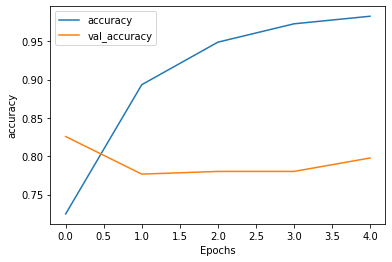

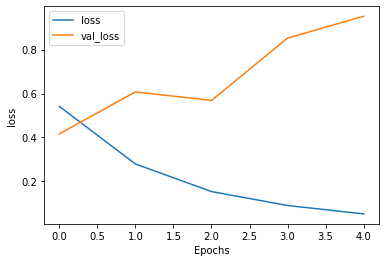

In [19]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history["val_"+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string,"val_"+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [20]:
df1=pd.read_csv("/content/test.csv",sep=',')
df1

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [21]:
test_sentences=df1["text"].astype(str)
test_sentences=np.array(test_sentences)
test_sentences[:5]

array(['Just happened a terrible car crash',
       'Heard about #earthquake is different cities, stay safe everyone.',
       'there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all',
       'Apocalypse lighting. #Spokane #wildfires',
       'Typhoon Soudelor kills 28 in China and Taiwan'], dtype=object)

In [22]:
import string

table = str.maketrans('', '', string.punctuation)
sentences=[]

for sentence in test_sentences:
        filtered_sentence=""
        sentence=sentence.split(" ")
        
        for word in sentence:
          word=word.lower()
          filter_word=""  
          for w in word:
            filter_word=filter_word+w.translate(table) 
          #print(filter_word)
          if filter_word in stopwords:

           filter_word=""

          filtered_sentence=filtered_sentence+" "+filter_word 
          
        sentences.append(filtered_sentence) 
print(sentences[:10])  

[' just happened  terrible car crash', ' heard  earthquake  different cities stay safe everyone', '    forest fire  spot pond geese  fleeing across  street  cannot save  ', ' apocalypse lighting spokane wildfires', ' typhoon soudelor kills 28  china  taiwan', '  shakingits  earthquake', ' theyd probably still show  life  arsenal  yesterday eh eh', ' hey   ', '   nice hat', ' fuck off']


In [0]:
test_sequences = tokenizer.texts_to_sequences(sentences)
test_padded = pad_sequences(test_sequences, padding=padding_type, maxlen=max_length)


In [0]:
results=model.predict(test_padded)
results=results.round().astype(int)

In [25]:
len(results)

3263

In [26]:
df2=pd.DataFrame(results)
df1["target"]=df2[0]
#df1=df1.drop(["keyword","location","text"],axis=1)
df1

,id,keyword,location,text,target
0,0,NaN,NaN,Just happened a terrible car crash,0
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",1
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",1
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,1
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,1
...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,1
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,1
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,1
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,1


In [0]:
df1.to_csv('submission1.csv', index = False)